In [18]:

 
#writing some conda package or module
#!pip install netCDF4

%matplotlib inline

import glob
from scipy import stats
import warnings
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
#!pip install cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point



In [19]:
rain_minimum = 1.0
rain_maximum = 250.0
rain_step = 1.0
spd = 86400.0
sph = 3600.0

nrainbin = int((rain_maximum-rain_minimum)/rain_step) + 1

rain_pdf = np.linspace(rain_minimum,rain_maximum, num=nrainbin, endpoint=True)
rain_bin = np.zeros((nrainbin-1))


In [20]:
pr = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/reanalysis/ERA5/pr_198001_202012_mon.nc')
#size = tp.tp.shape
#print(size)
pr

<xarray.Dataset>
Dimensions:    (time: 492, bnds: 2, longitude: 1440, latitude: 721)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-16T12:00:00 ... 2020-12-16T12:00:00
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Thu Jun 16 11:44:48 2022: cdo monavg ../daily/pr_1980_01_da...
    frequency:    mon
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [21]:
pr = pr.sel(time=slice('1980-01-16T12:00:00.000000000','2015-12-16T00:00:00.000000000'))

pr



<xarray.Dataset>
Dimensions:    (time: 431, bnds: 2, longitude: 1440, latitude: 721)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-16T12:00:00 ... 2015-11-16
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1980-01-01T01:00:00 ... 2015-12-01
    tp         (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Thu Jun 16 11:44:48 2022: cdo monavg ../daily/pr_1980_01_da...
    frequency:    mon
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [22]:
new_lat=np.arange(0,49,0.25)
pr=pr.interp(latitude=new_lat)
pr

<xarray.Dataset>
Dimensions:    (time: 431, bnds: 2, longitude: 1440, latitude: 196)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-16T12:00:00 ... 2015-11-16
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float64 0.0 0.25 0.5 0.75 ... 48.0 48.25 48.5 48.75
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1980-01-01T01:00:00 ... 2015-12-01
    tp         (time, latitude, longitude) float64 0.0002192 ... 8.508e-05
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Thu Jun 16 11:44:48 2022: cdo monavg ../daily/pr_1980_01_da...
    frequency:    mon
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [23]:
pr= pr.sel(longitude=slice(86,94),latitude=slice(18,27))
pr

<xarray.Dataset>
Dimensions:    (time: 431, bnds: 2, longitude: 33, latitude: 37)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-16T12:00:00 ... 2015-11-16
  * longitude  (longitude) float32 86.0 86.25 86.5 86.75 ... 93.5 93.75 94.0
  * latitude   (latitude) float64 18.0 18.25 18.5 18.75 ... 26.5 26.75 27.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1980-01-01T01:00:00 ... 2015-12-01
    tp         (time, latitude, longitude) float64 3.738e-06 ... 8.682e-06
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Thu Jun 16 11:44:48 2022: cdo monavg ../daily/pr_1980_01_da...
    frequency:    mon
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [24]:
size = pr.tp.shape
print(size)

(431, 37, 33)


In [25]:
for time in range(size[0]):
        data = pr.tp[time,Ellipsis]*1000*24
        nzd  = data.values[tuple(np.where(data >= rain_minimum))]
        hist = np.histogram(nzd,
                            bins = nrainbin-1,
                            range = (rain_minimum, rain_maximum))
        rain_bin = rain_bin + hist[0]

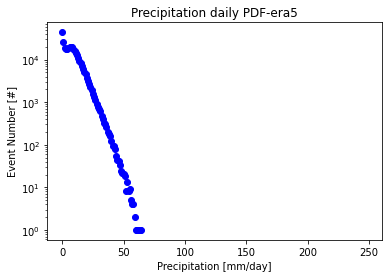

In [27]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(rain_bin, 'bo')
ax.set_yscale('log')
#ax.set_xscale('log')
plt.xlabel('Precipitation [mm/day]')
plt.ylabel('Event Number [#]')
plt.title('Precipitation daily PDF-era5')

plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/pdf_era5.png")

plt.show( )